In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

## Excercise H7.1

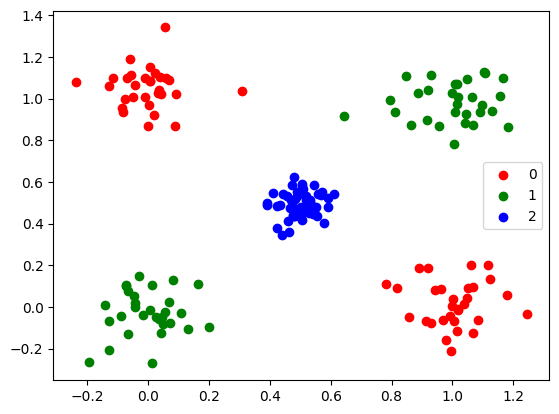

In [2]:
x0_0 = np.random.normal((0,1), 0.1, (30,2))
x0_1 = np.random.normal((1,0), 0.1, (30,2))
x1_0 = np.random.normal((0,0), 0.1, (30,2))
x1_1 = np.random.normal((1,1), 0.1, (30,2))

x0 = np.concatenate([x0_0, x0_1])
x1 = np.concatenate([x1_0, x1_1])
x2 = np.random.normal((0.5,0.5), 0.05, (60,2))

plt.scatter(x0[:,0], x0[:,1], color='r', label='0')
plt.scatter(x1[:,0], x1[:,1], color='g', label='1')
plt.scatter(x2[:,0], x2[:,1], color='b', label='2')
_ = plt.legend()

### create X matrix and corresponding labels

In [34]:
X = np.concatenate([x0, x1])

L = np.zeros((120, 2))
L[:60, 0] = 1
L[60:, 1] = 1

L_scalar = np.zeros(120)
L_scalar[:60] = 0
L_scalar[60:] = 1

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.])

### create X matrix and corresponding labels (3 classes)

In [4]:
X3 = np.concatenate([x0, x1, x2])

L3 = np.zeros((X3.shape[0], 3))
L3[:60, 0] = 1
L3[60:120, 1] = 1
L3[120:, 2] = 1

### create xy grid points 

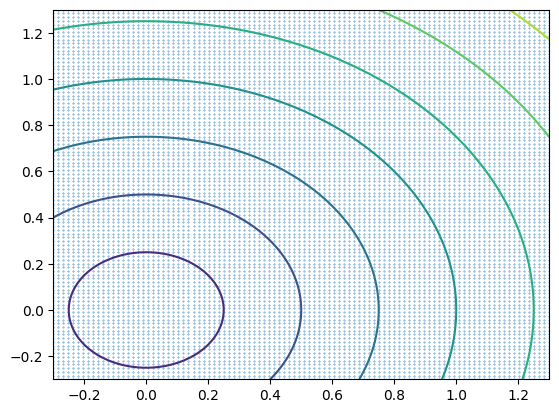

In [5]:
def createPoints(resolution):
    a = np.linspace(-0.3, 1.3, resolution)
    xx, yy = np.meshgrid(a,a)
    return xx, yy, np.column_stack([xx.ravel(), yy.ravel()])

resolution = 100
xx, yy, points = createPoints(resolution)

plt.contour(xx, yy, np.linalg.norm(points, axis=1).reshape(resolution, resolution))
plt.scatter(points[:, 0], points[:, 1], s=0.1)

## Excercise H7.2

In [6]:
def knn(x, k, X, L):
    # broadcast preperation
    x = np.repeat(x[:, np.newaxis], X.shape[0], axis=1)
    a = np.linalg.norm(X - x, axis=2)
    
    i = np.argsort(a, axis=1)[:, :k]
    m = L[i].mean(axis=1)
    return np.argmax(m, axis=1)
#     return m @ np.indices(m.shape, sparse=True)[1].T

x = np.array([[0.47, 0], [1, 1], [1, 0], [0, 1]])
knn(x, 10, X, L)

array([1, 1, 0, 0])

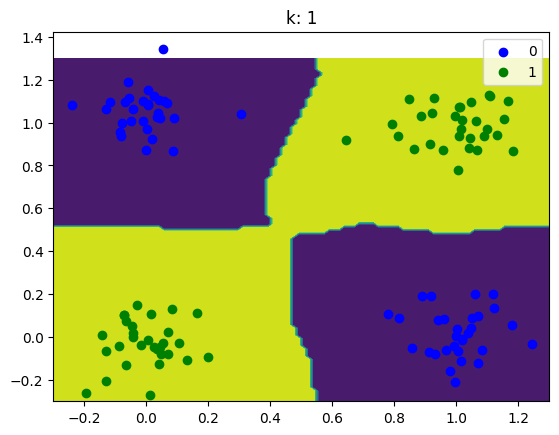

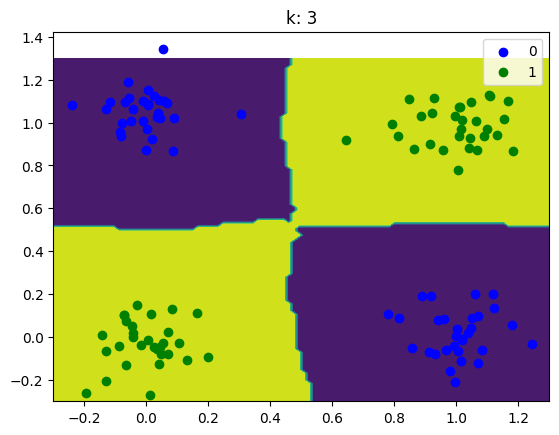

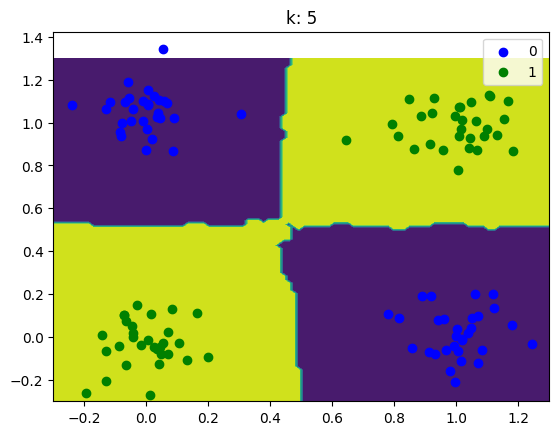

In [7]:
def plotContour(xx, yy, result, x0, x1, title):
#     plt.contourf(xx, yy, result, levels=1)
    plt.contourf(xx, yy, result)
    plt.scatter(x0[:,0], x0[:,1], color='b', label='0')
    plt.scatter(x1[:,0], x1[:,1], color='g', label='1')
    
    plt.title(title)
    plt.legend()
    
    plt.show()
    
for k in [1,3,5]:
    result = knn(points, k, X, L)
    result = result.reshape([resolution,resolution])
    
    title = f"k: {k}"
    plotContour(xx, yy, result, x0, x1, title)

# H7.3: Parzen Window

In [17]:
def gwf(x, sigma, x_training):
    x = np.repeat(x[:, np.newaxis], x_training.shape[0], axis=1)

    a = np.linalg.norm(x_training - x, axis=2)
    a = np.exp((-1/(2*sigma)) * a) 
    
    return a

def parzen(x, sigma, x_training, y_training):
    g = gwf(x, sigma, x_training)
    return np.argmax(g@y_training, axis=1)

x = np.array([[0., 0], [1, 1], [1, 0], [0, 1]])
parzen(x, 0.5, X, L)

array([1, 1, 0, 0])

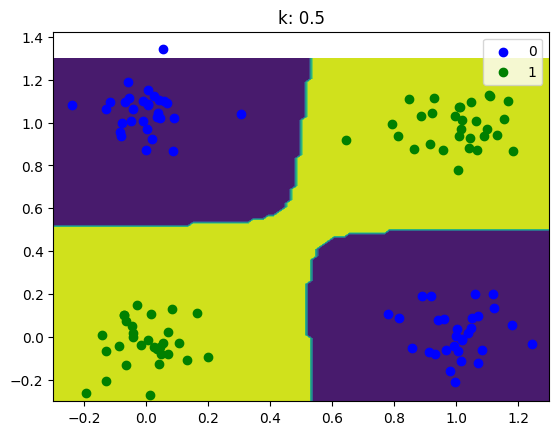

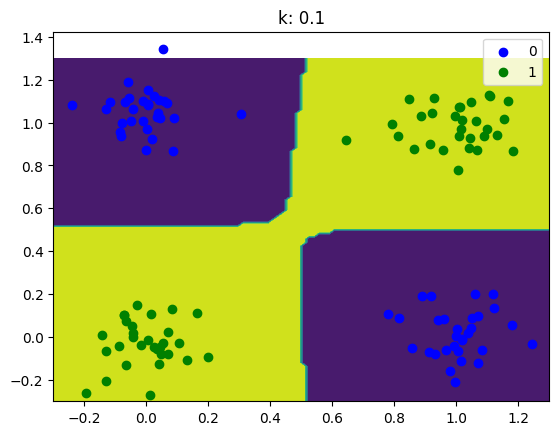

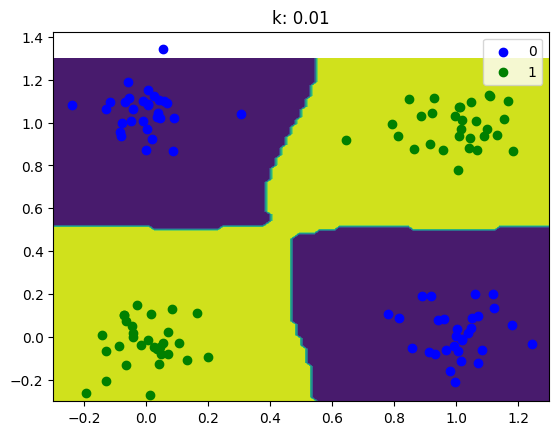

In [13]:
for sigma in [0.5, 0.1, 0.01]:
    result = parzen(points, sigma, X, L)
    result = result.reshape([resolution,resolution])
    
    title = f"k: {sigma}"
    plotContour(xx, yy, result, x0, x1, title)

## For 3 classes

In [14]:
def plotContour3(xx, yy, result, x0, x1, x2, title):
    plt.contourf(xx, yy, result, levels=3)
    plt.scatter(x0[:,0], x0[:,1], color='b', label='0')
    plt.scatter(x1[:,0], x1[:,1], color='g', label='1')
    plt.scatter(x2[:,0], x2[:,1], color='r', label='2')
    
    plt.title(title)
    plt.legend()
    
    plt.show()

### parzen

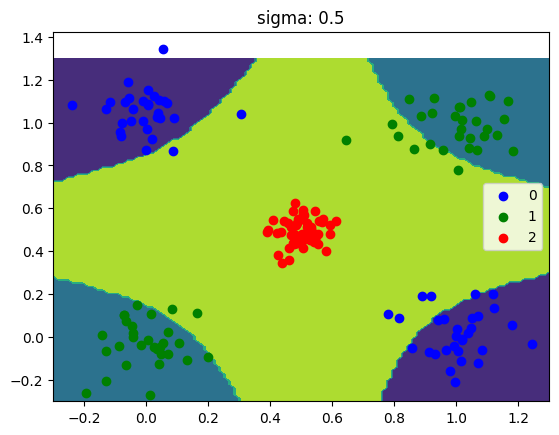

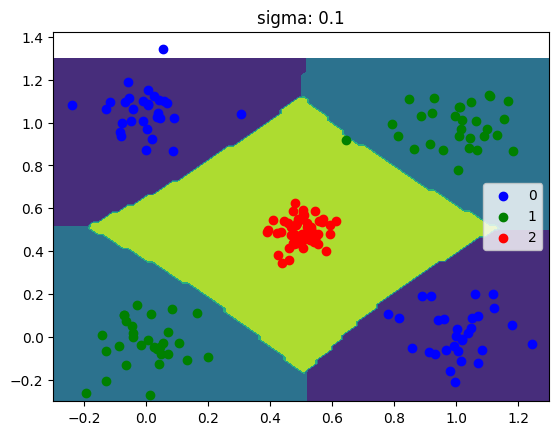

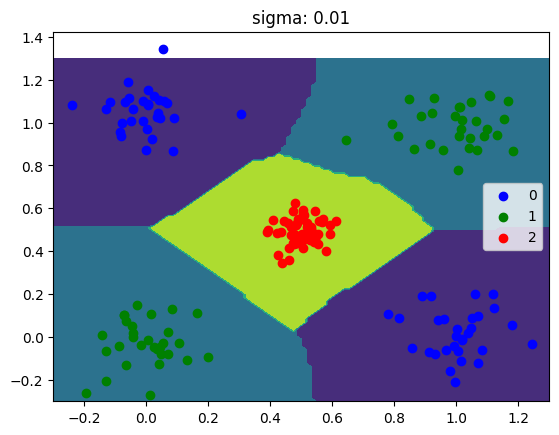

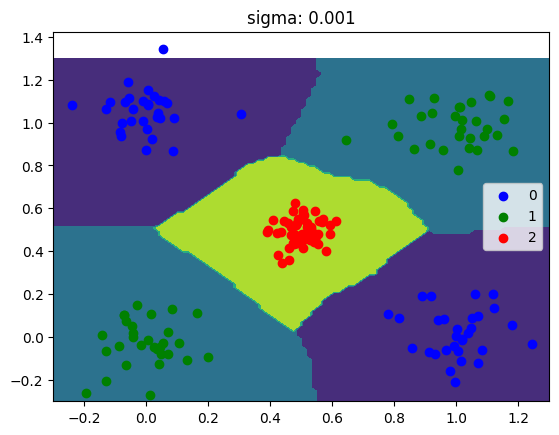

In [15]:
for sigma in [0.5, 0.1, 0.01, 0.001]:
    result = parzen(points, sigma, X3, L3)
    result = result.reshape([resolution,resolution])
    
    title = f"sigma: {sigma}"
    plotContour3(xx, yy, result, x0, x1, x2, title)

### kNN

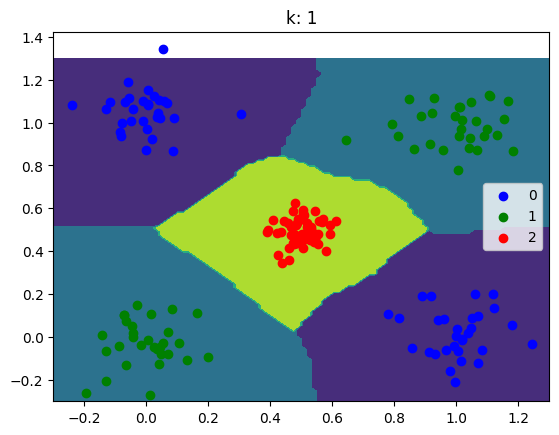

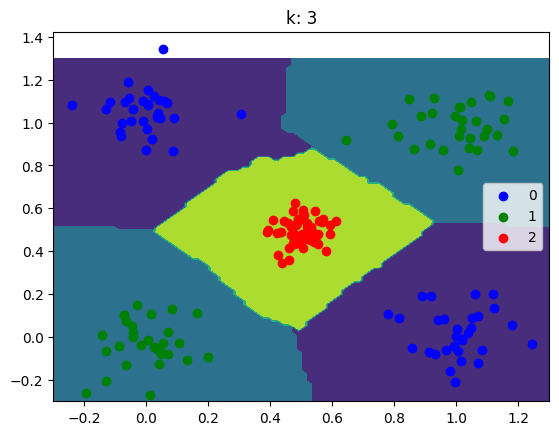

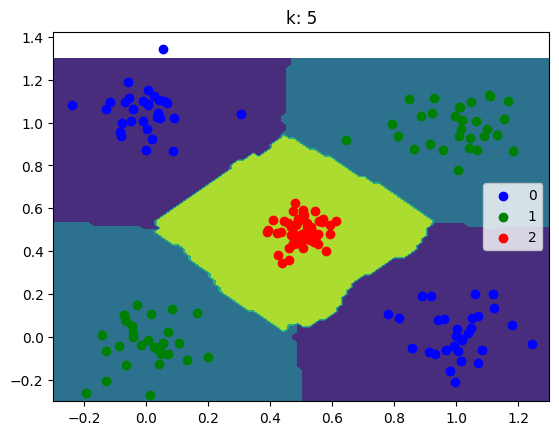

In [16]:
for k in [1,3,5]:
    result = knn(points, k, X3, L3)
    result = result.reshape([resolution,resolution])
    
    title = f"k: {k}"
    plotContour3(xx, yy, result, x0, x1, x2, title)

# H7.4: RBF Networks

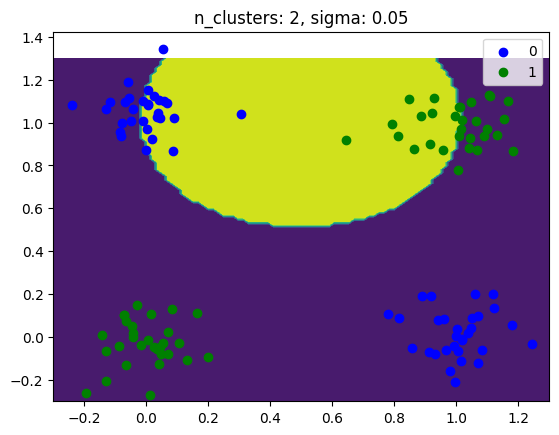

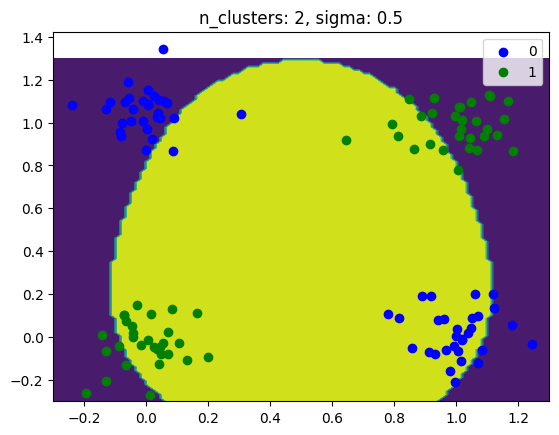

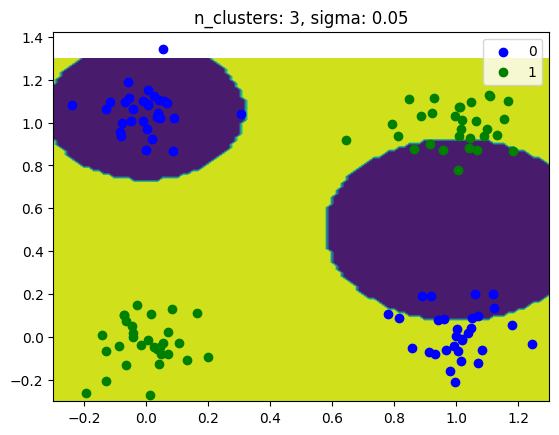

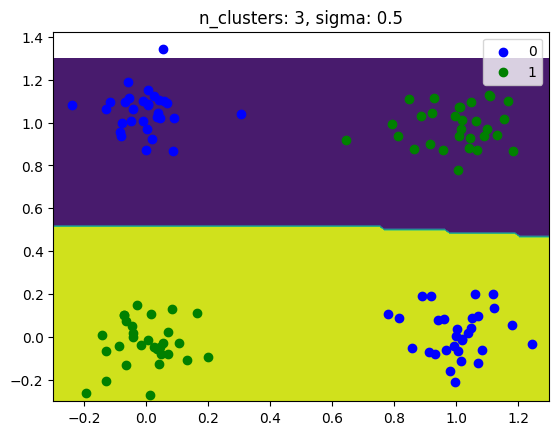

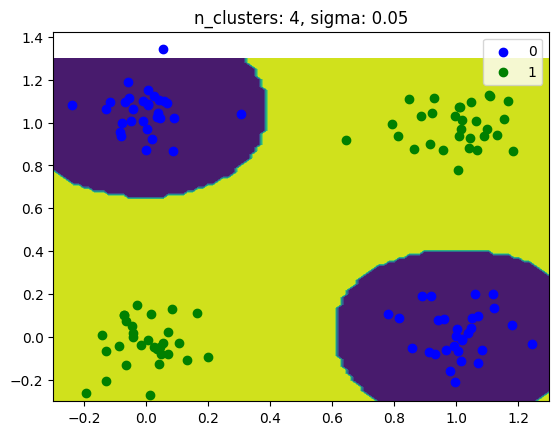

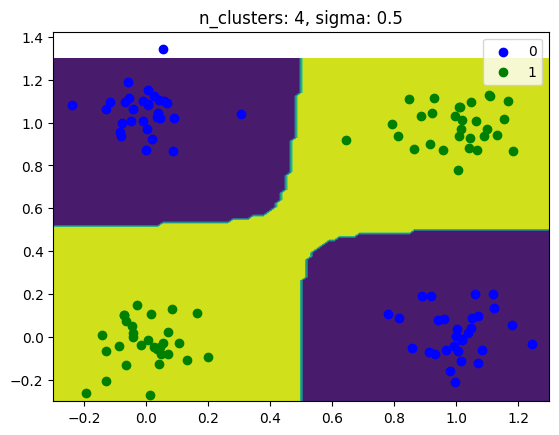

In [153]:
for n_clusters in [2,3,4]:
    for sigma in [0.05, 0.5]:
        kmeans = KMeans(n_clusters=n_clusters).fit(X)
        t = kmeans.cluster_centers_

        SIG = gwf(X, sigma, t)
        SIG = SIG.T
        SIG_1 = np.ones(SIG.shape[1])[:, np.newaxis].T 
        SIG = np.concatenate([SIG_1,SIG])

        w = np.linalg.inv(SIG@SIG.T) @ SIG @ L_scalar.T

        g = gwf(points, sigma, t)
        o = np.ones(resolution*resolution)[:, np.newaxis]
        g = np.hstack([o,g])
        r = np.heaviside(g@w-0.5, 1).reshape(resolution, resolution)
        # r = (g@w).reshape(resolution, resolution)

        title = f"n_clusters: {n_clusters}, sigma: {sigma}"
        plotContour(xx, yy, r, x0, x1, title)
